In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#display everything 
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('train.csv', encoding='utf-8')
test = pd.read_csv('test.csv', encoding='utf-8')
submission = pd.read_csv('sample_submission.csv')

In [4]:
train.shape, test.shape, submission.shape

((54273, 13), (36183, 12), (36183, 2))

In [5]:
display(train.isna().sum())
display(test.isna().sum())

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

From the above, we can see that there are no missing values in both the training and testing datasets

In [6]:
display(train.head())
display(test.head())

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


### Handling color variables

In [7]:
# Function to combine small categories
def combine_small_categories(df, column, threshold=0.01):
    counts = df[column].value_counts(normalize=True)
    small_categories = counts[counts < threshold].index
    df[column] = df[column].apply(lambda x: 'Other' if x in small_categories else x)
    return df


In [8]:
# Apply the function to each categorical column
categorical_columns = ['ext_col', 'int_col']
for col in categorical_columns:
    train = combine_small_categories(train, col)

In [9]:
# Apply the function to each categorical column
categorical_columns = ['ext_col', 'int_col']
for col in categorical_columns:
    test = combine_small_categories(test, col)

In [10]:
train['ext_col'].value_counts()

ext_col
Black     15078
White     13422
Gray       7909
Silver     5161
Blue       4668
Other      4259
Red        3013
Green       763
Name: count, dtype: int64

In [11]:
# Function to combine values
def combine_values(df, col, replace_value='Other'):
    df[col] = df[col].replace(['–', '-', '_'], replace_value)
    return df


In [12]:
# Apply function to DataFrame
train = combine_values(train, 'int_col')
test = combine_values(test, 'int_col')

In [13]:
test['int_col'].value_counts()

int_col
Black    21122
Beige     5468
Gray      4303
Other     2128
Brown     1333
Red       1059
White      770
Name: count, dtype: int64

### Working on the engine variable

In [14]:
import re
def extract_horsepower(engine_description):
  match = re.search(r"(\d+)\.0HP", engine_description)
  if match:
    return float(match.group(1))  
  else:
    return None  # Handle missing values

train["horsepower"] = train["engine"].apply(extract_horsepower)
test["horsepower"] = test["engine"].apply(extract_horsepower)


In [15]:
import re

def extract_displacement(engine_description):
    match = re.search(r"(\d+\.\d+L)", engine_description)
    if match:
        # Extract the numeric part and convert it to a float
        return float(match.group(1).replace('L', ''))
    else:
        return None  # Handle missing values

# Assuming 'train' is your DataFrame and 'engine' is the column containing engine descriptions
train["displacement_value"] = train["engine"].apply(extract_displacement)
test["displacement_value"] = test["engine"].apply(extract_displacement)

In [16]:

def extract_engine_type(engine_description):
    # Regex to match engine type after displacement and before fuel type
    match = re.search(r"\b\d\.\dL\s(.*?Engine)\b", engine_description)
    if match:
        return match.group(1)
    else:
        return None  # Handle missing values
train["engine_type"] = train["engine"].apply(extract_engine_type)
test["engine_type"] = test["engine"].apply(extract_engine_type)

In [17]:

def extract_fuel_type(engine_description):
    # Regex to match the fuel type at the end of the description
    match = re.search(r"(Gasoline Fuel|Diesel Fuel|Electric Fuel System|Hybrid|Gasoline/Mild Electric Hybrid|Flex Fuel Capability)", engine_description)
    if match:
        return match.group(1)
    else:
        return None  # Handle missing values
train["fuel_type"] = train["engine"].apply(extract_fuel_type)
test["fuel_type"] = test["engine"].apply(extract_fuel_type)

In [18]:
train.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,displacement_value,engine_type
0,0,Ford,F-150 Lariat,2018,74349,Gasoline Fuel,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,V6 Cylinder Engine
1,1,BMW,335 i,2007,80000,Gasoline Fuel,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,Straight 6 Cylinder Engine
2,2,Jaguar,XF Luxury,2009,91491,Gasoline Fuel,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Other,Beige,None reported,Yes,15000,300.0,4.2,8 Cylinder Engine


### Dealing with brand variable

In [19]:
## Grouping the car brands
brand_categories = {
    'performance_sports': [
        'Chevrolet', 'BMW', 'Porsche', 'Lamborghini',
        'Pontiac', 'Lotus'
    ],
    
    'luxury_luxury_EV': [
        'Mercedes-Benz', 'Audi', 'Maserati', 'Cadillac',
        'Volvo', 'Tesla', 'Jaguar', 'Rolls-Royce', 'Aston',
        'Ferrari', 'Bentley', 'Acura', 'Lexus', 'Lincoln',
        'Hummer', 'Genesis', 'Land', 'Buick', 'INFINITI',
        'McLaren', 'Alfa', 'Lucid', 'Maybach', 'Bugatti'
    ],

    'mid_range': [
        'Mitsubishi', 'Ford', 'Nissan', 'Toyota', 'Dodge',
        'Volkswagen', 'Mazda', 'Chrysler', 'Rivian', 'GMC'
    ],

    'affordable': [
        'Honda', 'Hyundai', 'Subaru', 'Kia',
        'Scion', 'Saturn', 'Mercury',
        'FIAT', 'Plymouth', 'Suzuki'
    ],

    'offroad': [
        'Jeep', 'RAM', 'MINI'
    ]
}

def assign_brand_group(brand):
    for group_name, brands in brand_categories.items():
        if brand in brands:
            return group_name
    return "Others"  # Assign to "Others" if not found in any defined groups

train["brand_group"] = train["brand"].apply(assign_brand_group)
test["brand_group"] = test["brand"].apply(assign_brand_group)


### Handling transmission variable

In [20]:
train['transmission'].tail(5)

54268                          8-Speed A/T
54269                          6-Speed A/T
54270       Transmission w/Dual Shift Mode
54271    8-Speed Automatic with Auto-Shift
54272                          8-Speed A/T
Name: transmission, dtype: object

In [21]:
# Define the mapping for each category
transmission_mapping = {
    'automatic': ['A/T', 'Automatic', 'Automatic CVT', 'Transmission w/Dual Shift Mode', 'Transmission Overdrive Switch',
                  'Electronically Controlled Automatic', 'with Overdrive', 'with Auto-Shift', 'DCT Automatic'],
    'manual': ['M/T', 'Manual'],
    'cvt': ['CVT Transmission', 'CVT-F', 'Variable'],
    'dct': ['DCT Automatic'],
    'other': ['SCHEDULED FOR OR IN PRODUCTION', '–', 'F']
}

# Function to categorize the transmission
def categorize_transmission(transmission):
    transmission = transmission.lower()
    if any(keyword.lower() in transmission for keyword in transmission_mapping['automatic']):
        return 'automatic'
    elif any(keyword.lower() in transmission for keyword in transmission_mapping['manual']):
        return 'manual'
    elif any(keyword.lower() in transmission for keyword in transmission_mapping['cvt']):
        return 'cvt'
    elif any(keyword.lower() in transmission for keyword in transmission_mapping['dct']):
        return 'dct'
    else:
        return 'other'

# Apply the categorization
train['transmission_category'] = train['transmission'].apply(categorize_transmission)
test['transmission_category'] = test['transmission'].apply(categorize_transmission)

In [22]:
# Create boolean features for special characteristics on the training set  
train['dual_shift_mode'] = train['transmission'].str.contains('Dual Shift Mode', case=False, na=False).astype(int)
train['overdrive'] = train['transmission'].str.contains('Overdrive', case=False, na=False).astype(int)
train['auto_shift'] = train['transmission'].str.contains('Auto-Shift', case=False, na=False).astype(int)

# Create boolean features for special characteristics on the testing set
test['dual_shift_mode'] = test['transmission'].str.contains('Dual Shift Mode', case=False, na=False).astype(int)
test['overdrive'] = test['transmission'].str.contains('Overdrive', case=False, na=False).astype(int)
test['auto_shift'] = test['transmission'].str.contains('Auto-Shift', case=False, na=False).astype(int)


In [23]:
car_categoricals = ['int_col','ext_col','fuel_type','engine_type',
                    'transmission_category','accident','brand_group',]

In [24]:
# Apply the function to each categorical column
for col in car_categoricals:
    train = combine_small_categories(train, col)
    test = combine_small_categories(test, col)

In [25]:
cols_drop = ['brand', 'model', 'engine','clean_title', 'id', 'transmission']

In [26]:
train.drop(columns=cols_drop, axis=1, inplace=True)
test.drop(columns=cols_drop, axis=1, inplace=True)

In [27]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model_year             54273 non-null  int64  
 1   milage                 54273 non-null  int64  
 2   fuel_type              50120 non-null  object 
 3   ext_col                54273 non-null  object 
 4   int_col                54273 non-null  object 
 5   accident               54273 non-null  object 
 6   price                  54273 non-null  int64  
 7   horsepower             50216 non-null  float64
 8   displacement_value     53667 non-null  float64
 9   engine_type            50065 non-null  object 
 10  brand_group            54273 non-null  object 
 11  transmission_category  54273 non-null  object 
 12  dual_shift_mode        54273 non-null  int32  
 13  overdrive              54273 non-null  int32  
 14  auto_shift             54273 non-null  int32  
dtypes:

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model_year             36183 non-null  int64  
 1   milage                 36183 non-null  int64  
 2   fuel_type              33485 non-null  object 
 3   ext_col                36183 non-null  object 
 4   int_col                36183 non-null  object 
 5   accident               36183 non-null  object 
 6   horsepower             33577 non-null  float64
 7   displacement_value     35778 non-null  float64
 8   engine_type            33451 non-null  object 
 9   brand_group            36183 non-null  object 
 10  transmission_category  36183 non-null  object 
 11  dual_shift_mode        36183 non-null  int32  
 12  overdrive              36183 non-null  int32  
 13  auto_shift             36183 non-null  int32  
dtypes: float64(2), int32(3), int64(2), object(7)
memory us

None

In [28]:
missing_values = train.isna().sum()
pct_missing_values = train.isna().sum()/len(train)*100
missing_df = pd.concat([missing_values, pct_missing_values], axis=1)
missing_df = missing_df.rename(columns={0:'count_of_missing_values', 1:'%_missing_values'})
missing_df.sort_values(by='%_missing_values', ascending=False)

,count_of_missing_values,%_missing_values
engine_type,4208,7.753395
fuel_type,4153,7.652055
horsepower,4057,7.475172
displacement_value,606,1.116577
model_year,0,0.000000
milage,0,0.000000
ext_col,0,0.000000
int_col,0,0.000000
accident,0,0.000000
price,0,0.000000


In [29]:
missing_values = test.isna().sum()
pct_missing_values = test.isna().sum()/len(test)*100
missing_df = pd.concat([missing_values, pct_missing_values], axis=1)
missing_df = missing_df.rename(columns={0:'count_of_missing_values', 1:'%_missing_values'})
missing_df.sort_values(by='%_missing_values', ascending=False)

,count_of_missing_values,%_missing_values
engine_type,2732,7.550507
fuel_type,2698,7.456540
horsepower,2606,7.202277
displacement_value,405,1.119310
model_year,0,0.000000
milage,0,0.000000
ext_col,0,0.000000
int_col,0,0.000000
accident,0,0.000000
brand_group,0,0.000000


### Imputing the missing values in both the test and train sets 

In [30]:
def impute_missing_values_with_mode(df, col):
    mode_value = df[col].mode()[0]  # Get the mode of the column
    df[col] = df[col].fillna(mode_value)  # Fill missing values with the mode
    return df


In [31]:
# Fill missing values in train DataFrame
train = impute_missing_values_with_mode(train, 'fuel_type')
train = impute_missing_values_with_mode(train, 'engine_type')

# Fill missing values in test DataFrame
test = impute_missing_values_with_mode(test, 'fuel_type')
test = impute_missing_values_with_mode(test, 'engine_type')

In [32]:
def impute_missing_values_with_median(df, col):
    median_value = df[col].median()  # Get the median of the column
    df[col] = df[col].fillna(median_value)  # Fill missing values with the mode
    return df


In [33]:
# training dataset
train = impute_missing_values_with_median(train, 'horsepower')
train = impute_missing_values_with_median(train, 'displacement_value')

#testing dataset
test = impute_missing_values_with_median(test, 'horsepower')
test = impute_missing_values_with_median(test, 'displacement_value')

In [34]:
car_cols2 = train.select_dtypes(include='object').columns
car_cols2

Index(['fuel_type', 'ext_col', 'int_col', 'accident', 'engine_type',
       'brand_group', 'transmission_category'],
      dtype='object')

### Encoding the categorical variables 

In [35]:
# Combinin the train and test data for the encoding purposes 
combined_data = pd.concat([train, test], axis=0)

In [36]:
from sklearn.preprocessing import LabelEncoder
def label_encode_categorical(df):
    # Identify categorical columns
    categorical_columns = combined_data.select_dtypes(include=['object', 'category']).columns
    
    # Fit and transform the training data, and transform the test data
    for col in categorical_columns:
        le = LabelEncoder()
        combined_data[col] = le.fit_transform(combined_data[col])
    return df

In [37]:
combined_df = label_encode_categorical(combined_data)

## Scaling the numerical variables

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numeric_cols = test.select_dtypes(include='number').columns  # Select numeric columns
def scale_data(df, scaler=MinMaxScaler()):
    """
    Scales numeric columns in a DataFrame using the specified scaler.

    Parameters:
    df (pd.DataFrame): The input DataFrame to scale.
    scaler (object): The scaler instance to use (default is MinMaxScaler).

    Returns:
    pd.DataFrame: The DataFrame with scaled numeric columns.
    """
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])  # Apply the scaler to numeric columns
    return df

In [39]:
scaled_combined_df = scale_data(combined_df)

In [40]:
scaled_combined_df.head()

,model_year,milage,fuel_type,ext_col,int_col,accident,price,horsepower,displacement_value,engine_type,brand_group,transmission_category,dual_shift_mode,overdrive,auto_shift
0,0.88,0.183376,2,1,3,1,11000.0,0.321053,0.367742,5,3,1,0.0,0.0,0.0
1,0.66,0.197333,2,0,1,1,8250.0,0.242105,0.303226,4,5,3,0.0,0.0,0.0
2,0.70,0.225713,2,4,0,1,15000.0,0.242105,0.458065,1,2,1,0.0,0.0,0.0
3,0.96,0.005772,3,2,2,1,63500.0,0.278947,0.303226,4,5,1,1.0,0.0,0.0
4,0.54,0.273895,2,7,1,1,7850.0,0.136842,0.406452,5,5,1,0.0,0.0,0.0


In [41]:

# Split back into train and test sets
scaled_train = scaled_combined_df.iloc[:len(train), :]
scaled_test = scaled_combined_df.iloc[len(train):, :]


In [42]:
scaled_train.shape, scaled_test.shape

((54273, 15), (36183, 15))

In [43]:
scaled_test.drop(columns='price', axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_5712\2955031298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_test.drop(columns='price', axis=1, inplace=True)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [45]:
X = scaled_train.drop(columns='price', axis=1, inplace=False) 
y = scaled_train['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42 )


In [49]:
# Necessary imports
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Function to train models and visualize RMSE
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = [
        ('CatBoost', CatBoostRegressor(verbose=0)),
        ('XGB', XGBRegressor(verbosity=0)),
        ('LGBM', LGBMRegressor())
    ]
    
    # Lists to store results
    names = []
    rmse_scores = []
    
    # Train and evaluate each model
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        names.append(name)
        rmse_scores.append(rmse)
        print(f"{name} RMSE: {rmse:.3f}")
        
        # Visualize RMSE scores in a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(names, rmse_scores, color=['blue', 'green', 'red'])
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.title('RMSE of Different Regression Models')
    plt.show()


CatBoost RMSE: 54846.201
XGB RMSE: 57215.066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
LGBM RMSE: 48931.310


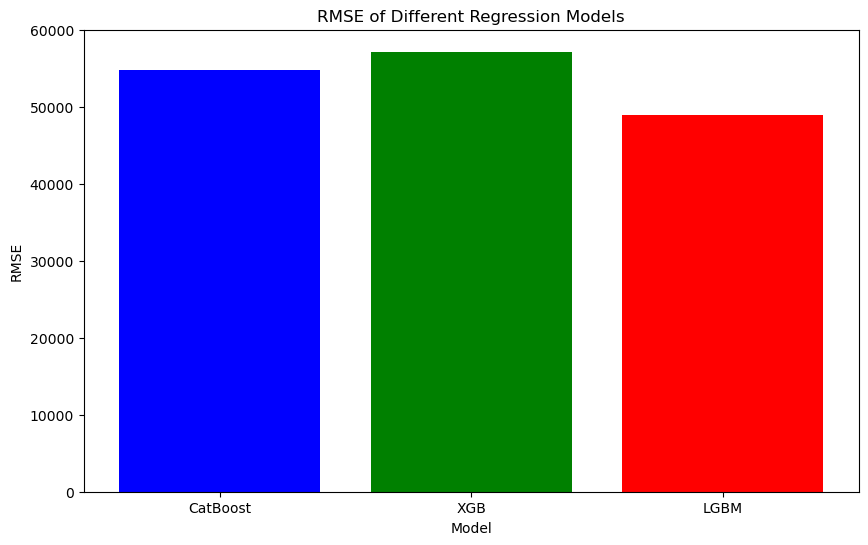

In [50]:
train_and_evaluate_models(X_train, X_test, y_train, y_test)

In [51]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


LGBMRegressor()

In [52]:
lgbm_pred = lgbm.predict(X_test)
rmse = mean_squared_error(y_test, lgbm_pred, squared=False)  # Calculate RMSE
r2_train = lgbm.score(X_train, y_train)
r2_test = lgbm.score(X_test, y_test)
print(f"Lgbm train R2 is: {r2_train}")
print(f"Lgbm test R2 is: {r2_test}")
print(f"LGBM Model RMSE: {rmse}")

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lgbm train R2 is: 0.3087169473898542
Lgbm test R2 is: 0.18520585495258113
LGBM Model RMSE: 48931.30960646055


In [53]:
lgbm_predictions =lgbm.predict(scaled_test)

In [54]:
# Create submission file
sub = pd.DataFrame({'id': submission['id'], 'price': lgbm_predictions})

# Preview sub file
sub.head()

,id,price
0,54273,23916.407736
1,54274,18399.130487
2,54275,26412.117190
3,54276,66045.605306
4,54277,37510.554271


In [55]:
# Create a csv file
#sub.to_csv('submission8.csv', index = False)

In [56]:
import optuna

# Define objective function for Optuna to optimize
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    # Initialize LGBMRegressor with current parameters
    model = LGBMRegressor(**params, random_state=42)

    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse


In [57]:
# Setup Optuna study
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

# Print best parameters and best score
print("Best Parameters:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2024-06-23 12:11:52,406] A new study created in memory with name: no-name-0edad6be-9870-45e1-a190-e55cdac69de0
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugges

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:11:54,731] Trial 0 finished with value: 49083.435594444534 and parameters: {'num_leaves': 50, 'learning_rate': 0.2536999076681772, 'max_depth': 13, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 8.629132190071849e-05, 'reg_lambda': 2.231010801867923e-05, 'min_child_samples': 88}. Best is trial 0 with value: 49083.435594444534.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:11:55,589] Trial 1 finished with value: 47786.79752175341 and parameters: {'num_leaves': 68, 'learning_rate': 0.11114989443094977, 'max_depth': 5, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'reg_alpha': 0.00018794668241638458, 'reg_lambda': 0.00012329623163659834, 'min_child_samples': 22}. Best is trial 1 with value: 47786.79752175341.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
C:\Users\PC\AppData\Lo

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:11:57,485] Trial 2 finished with value: 47634.46684949353 and parameters: {'num_leaves': 44, 'learning_rate': 0.05958389350068958, 'max_depth': 9, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447411578889518, 'reg_alpha': 6.870101665590028e-05, 'reg_lambda': 0.0005660670699258885, 'min_child_samples': 40}. Best is trial 2 with value: 47634.46684949353.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:11:58,758] Trial 3 finished with value: 48715.702420599446 and parameters: {'num_leaves': 56, 'learning_rate': 0.14447746112718687, 'max_depth': 7, 'subsample': 0.8056937753654446, 'colsample_bytree': 0.836965827544817, 'reg_alpha': 1.8997763474111268e-05, 'reg_lambda': 0.0441844152119972, 'min_child_samples': 21}. Best is trial 2 with value: 47634.46684949353.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:11:59,746] Trial 4 finished with value: 48866.25081347685 and parameters: {'num_leaves': 25, 'learning_rate': 0.2521267904777921, 'max_depth': 15, 'subsample': 0.9233589392465844, 'colsample_bytree': 0.7218455076693483, 'reg_alpha': 3.855073690026178e-05, 'reg_lambda': 0.12746711578215045, 'min_child_samples': 47}. Best is trial 2 with value: 47634.46684949353.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:00,906] Trial 5 finished with value: 47263.500345720655 and parameters: {'num_leaves': 29, 'learning_rate': 0.05388108577817234, 'max_depth': 5, 'subsample': 0.9637281608315128, 'colsample_bytree': 0.7035119926400067, 'reg_alpha': 0.0944351568796267, 'reg_lambda': 0.0007417652034871827, 'min_child_samples': 54}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:02,245] Trial 6 finished with value: 47617.39092365927 and parameters: {'num_leaves': 64, 'learning_rate': 0.01875220945578641, 'max_depth': 15, 'subsample': 0.9100531293444458, 'colsample_bytree': 0.9757995766256756, 'reg_alpha': 2.3386439256208704, 'reg_lambda': 0.038672288491177424, 'min_child_samples': 93}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:03,852] Trial 7 finished with value: 47675.20025400037 and parameters: {'num_leaves': 27, 'learning_rate': 0.01947558230629543, 'max_depth': 5, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757928, 'reg_alpha': 0.0004247116662617141, 'reg_lambda': 0.9384800715909529, 'min_child_samples': 39}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:05,309] Trial 8 finished with value: 47484.43734078048 and parameters: {'num_leaves': 42, 'learning_rate': 0.06333268775321843, 'max_depth': 6, 'subsample': 0.9208787923016158, 'colsample_bytree': 0.6298202574719083, 'reg_alpha': 8.342988013047341, 'reg_lambda': 0.43000015861626045, 'min_child_samples': 24}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:06,111] Trial 9 finished with value: 49533.149802695814 and parameters: {'num_leaves': 20, 'learning_rate': 0.1601531217136121, 'max_depth': 12, 'subsample': 0.8916028672163949, 'colsample_bytree': 0.9085081386743783, 'reg_alpha': 2.781428564375753e-05, 'reg_lambda': 0.0014151235919053699, 'min_child_samples': 16}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:08,746] Trial 10 finished with value: 48607.1980871724 and parameters: {'num_leaves': 96, 'learning_rate': 0.010206070557576998, 'max_depth': 9, 'subsample': 0.6071847502459278, 'colsample_bytree': 0.7090747508804338, 'reg_alpha': 0.1385104184841322, 'reg_lambda': 5.73620251630527, 'min_child_samples': 69}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:10,247] Trial 11 finished with value: 47378.6933844893 and parameters: {'num_leaves': 36, 'learning_rate': 0.05066279925177419, 'max_depth': 7, 'subsample': 0.9783238879894853, 'colsample_bytree': 0.6133578302780329, 'reg_alpha': 8.098247674170269, 'reg_lambda': 0.0024847588207063767, 'min_child_samples': 65}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDa

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:11,661] Trial 12 finished with value: 47400.35090271675 and parameters: {'num_leaves': 36, 'learning_rate': 0.027912153491801303, 'max_depth': 7, 'subsample': 0.9872607155373294, 'colsample_bytree': 0.6257372131795154, 'reg_alpha': 0.06686699170398881, 'reg_lambda': 0.003914090495844409, 'min_child_samples': 66}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:13,451] Trial 13 finished with value: 47315.8467459842 and parameters: {'num_leaves': 76, 'learning_rate': 0.03903858603536136, 'max_depth': 8, 'subsample': 0.9984066126989742, 'colsample_bytree': 0.684887414915549, 'reg_alpha': 0.005486054780596624, 'reg_lambda': 0.0005204631774806725, 'min_child_samples': 65}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:18,158] Trial 14 finished with value: 47354.05052154826 and parameters: {'num_leaves': 81, 'learning_rate': 0.037144135906544085, 'max_depth': 10, 'subsample': 0.8578694741072342, 'colsample_bytree': 0.7796937548766031, 'reg_alpha': 0.0014730328623335294, 'reg_lambda': 0.00013262449021038777, 'min_child_samples': 79}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:21,439] Trial 15 finished with value: 47742.791901595454 and parameters: {'num_leaves': 77, 'learning_rate': 0.09160994419974852, 'max_depth': 8, 'subsample': 0.9509476077214297, 'colsample_bytree': 0.6810381919322529, 'reg_alpha': 0.010035048090158021, 'reg_lambda': 1.6989804820852618e-05, 'min_child_samples': 55}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:23,730] Trial 16 finished with value: 47351.803064227286 and parameters: {'num_leaves': 95, 'learning_rate': 0.0330552246243208, 'max_depth': 11, 'subsample': 0.77923661166059, 'colsample_bytree': 0.7532329274044126, 'reg_alpha': 0.1986352901063075, 'reg_lambda': 0.0003096235530082275, 'min_child_samples': 55}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:24,801] Trial 17 finished with value: 47478.33027399229 and parameters: {'num_leaves': 82, 'learning_rate': 0.08407654179943178, 'max_depth': 5, 'subsample': 0.8715960262589024, 'colsample_bytree': 0.6803255311489224, 'reg_alpha': 0.004345880761785714, 'reg_lambda': 0.016603543253036524, 'min_child_samples': 75}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:26,507] Trial 18 finished with value: 47327.44892174948 and parameters: {'num_leaves': 69, 'learning_rate': 0.04323444823345438, 'max_depth': 8, 'subsample': 0.9613676974312834, 'colsample_bytree': 0.8160380080454376, 'reg_alpha': 0.025281436440769696, 'reg_lambda': 0.007352704786614045, 'min_child_samples': 99}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:28,730] Trial 19 finished with value: 47415.44732961321 and parameters: {'num_leaves': 87, 'learning_rate': 0.023333530158706012, 'max_depth': 6, 'subsample': 0.6017949844194721, 'colsample_bytree': 0.7237669253842854, 'reg_alpha': 0.9145424437209991, 'reg_lambda': 7.432962123822877e-05, 'min_child_samples': 35}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:30,519] Trial 20 finished with value: 48221.306919206974 and parameters: {'num_leaves': 56, 'learning_rate': 0.01173599692785137, 'max_depth': 9, 'subsample': 0.6628974418511197, 'colsample_bytree': 0.6597346726890919, 'reg_alpha': 0.0015650066712313941, 'reg_lambda': 0.0008480606911833949, 'min_child_samples': 57}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:32,209] Trial 21 finished with value: 47360.024641426025 and parameters: {'num_leaves': 71, 'learning_rate': 0.045989693733405376, 'max_depth': 8, 'subsample': 0.9502583389350209, 'colsample_bytree': 0.8075301549946484, 'reg_alpha': 0.02445583047148844, 'reg_lambda': 0.006125245673012747, 'min_child_samples': 97}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\A

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:33,918] Trial 22 finished with value: 49631.267614626566 and parameters: {'num_leaves': 76, 'learning_rate': 0.04308515119132366, 'max_depth': 10, 'subsample': 0.9522985279777161, 'colsample_bytree': 0.8738445964974808, 'reg_alpha': 0.027483512170123278, 'reg_lambda': 0.008648234410108672, 'min_child_samples': 5}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:35,287] Trial 23 finished with value: 47424.46068733031 and parameters: {'num_leaves': 61, 'learning_rate': 0.07157608708663106, 'max_depth': 8, 'subsample': 0.9977130327249748, 'colsample_bytree': 0.7787094917665794, 'reg_alpha': 0.4185104181355613, 'reg_lambda': 0.00036856879408206714, 'min_child_samples': 86}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:36,762] Trial 24 finished with value: 47463.83205277739 and parameters: {'num_leaves': 87, 'learning_rate': 0.030034023428346837, 'max_depth': 6, 'subsample': 0.9498859797103634, 'colsample_bytree': 0.7442578096512015, 'reg_alpha': 0.0071224831788172386, 'reg_lambda': 0.0017189553904035405, 'min_child_samples': 79}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:38,707] Trial 25 finished with value: 48188.04052249703 and parameters: {'num_leaves': 69, 'learning_rate': 0.014023347876983932, 'max_depth': 10, 'subsample': 0.8934469652223761, 'colsample_bytree': 0.8012364486139857, 'reg_alpha': 0.03022777916577448, 'reg_lambda': 0.019858171361660487, 'min_child_samples': 100}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:40,097] Trial 26 finished with value: 47424.054326777106 and parameters: {'num_leaves': 56, 'learning_rate': 0.038251646240773825, 'max_depth': 7, 'subsample': 0.8325593181256693, 'colsample_bytree': 0.8353690020265996, 'reg_alpha': 0.002185515193054722, 'reg_lambda': 4.34531091979032e-05, 'min_child_samples': 72}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:44,677] Trial 27 finished with value: 47462.404119987455 and parameters: {'num_leaves': 49, 'learning_rate': 0.05216702167766569, 'max_depth': 11, 'subsample': 0.9700505870963769, 'colsample_bytree': 0.6960571958355272, 'reg_alpha': 0.0005705339659456088, 'reg_lambda': 0.00029004240338865783, 'min_child_samples': 61}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:47,776] Trial 28 finished with value: 47342.912488949354 and parameters: {'num_leaves': 75, 'learning_rate': 0.02507353181286162, 'max_depth': 8, 'subsample': 0.9255413060137144, 'colsample_bytree': 0.6532912859582701, 'reg_alpha': 0.06343383527693555, 'reg_lambda': 0.13958972970053352, 'min_child_samples': 46}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:49,720] Trial 29 finished with value: 47458.97167836649 and parameters: {'num_leaves': 90, 'learning_rate': 0.07700289234482116, 'max_depth': 6, 'subsample': 0.8295783063339567, 'colsample_bytree': 0.8777718346547335, 'reg_alpha': 0.011661559460649548, 'reg_lambda': 0.004394594347332282, 'min_child_samples': 89}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:52,176] Trial 30 finished with value: 48048.19483558039 and parameters: {'num_leaves': 64, 'learning_rate': 0.1229364729027871, 'max_depth': 12, 'subsample': 0.8738945895178951, 'colsample_bytree': 0.6008612192692453, 'reg_alpha': 0.5380312529617896, 'reg_lambda': 4.633541982358969e-05, 'min_child_samples': 82}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:12:56,813] Trial 31 finished with value: 47332.1569883933 and parameters: {'num_leaves': 74, 'learning_rate': 0.022807278152722175, 'max_depth': 8, 'subsample': 0.9447274511338819, 'colsample_bytree': 0.6485372782829163, 'reg_alpha': 0.07400728301175266, 'reg_lambda': 0.08659549055335411, 'min_child_samples': 47}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:01,276] Trial 32 finished with value: 47433.26278296707 and parameters: {'num_leaves': 72, 'learning_rate': 0.018986760780313767, 'max_depth': 9, 'subsample': 0.9994348356846481, 'colsample_bytree': 0.648752450102718, 'reg_alpha': 0.1111518987150512, 'reg_lambda': 0.1371186809142164, 'min_child_samples': 48}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDat

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:04,476] Trial 33 finished with value: 47442.39284963134 and parameters: {'num_leaves': 81, 'learning_rate': 0.03625393675807768, 'max_depth': 8, 'subsample': 0.9569684600541349, 'colsample_bytree': 0.6880096091732868, 'reg_alpha': 0.020518729978521853, 'reg_lambda': 0.0008453782380365557, 'min_child_samples': 40}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\A

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:06,379] Trial 34 finished with value: 47369.25823249654 and parameters: {'num_leaves': 66, 'learning_rate': 0.05718438958949782, 'max_depth': 5, 'subsample': 0.9302558363672154, 'colsample_bytree': 0.6419260187644336, 'reg_alpha': 0.0036382304106575003, 'reg_lambda': 0.03333154723218095, 'min_child_samples': 30}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:09,309] Trial 35 finished with value: 47361.42171282222 and parameters: {'num_leaves': 51, 'learning_rate': 0.022562387992226807, 'max_depth': 7, 'subsample': 0.9709462303645454, 'colsample_bytree': 0.7191089399700726, 'reg_alpha': 0.057204499730080745, 'reg_lambda': 0.00015830110999314812, 'min_child_samples': 50}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:11,945] Trial 36 finished with value: 47773.088029073966 and parameters: {'num_leaves': 62, 'learning_rate': 0.014982701775944794, 'max_depth': 9, 'subsample': 0.8968622976599171, 'colsample_bytree': 0.6711824869379552, 'reg_alpha': 0.22801765230603424, 'reg_lambda': 0.07630941473698076, 'min_child_samples': 59}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:15,027] Trial 37 finished with value: 47719.987962342064 and parameters: {'num_leaves': 69, 'learning_rate': 0.044953004150970144, 'max_depth': 11, 'subsample': 0.7676549272020203, 'colsample_bytree': 0.7727495463049215, 'reg_alpha': 1.8545810320364609, 'reg_lambda': 0.3527177002369455, 'min_child_samples': 42}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:17,493] Trial 38 finished with value: 47521.70557433044 and parameters: {'num_leaves': 74, 'learning_rate': 0.06561809801704312, 'max_depth': 6, 'subsample': 0.9329417321253382, 'colsample_bytree': 0.8266402508612634, 'reg_alpha': 1.0375469729128144e-05, 'reg_lambda': 0.01233471830216251, 'min_child_samples': 33}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\A

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:20,379] Trial 39 finished with value: 49205.0488295399 and parameters: {'num_leaves': 51, 'learning_rate': 0.22065541126061422, 'max_depth': 14, 'subsample': 0.9803352379816823, 'colsample_bytree': 0.9919381085597447, 'reg_alpha': 0.01385479582440115, 'reg_lambda': 2.4834627419091992, 'min_child_samples': 64}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDa

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:22,267] Trial 40 finished with value: 47771.63231415848 and parameters: {'num_leaves': 32, 'learning_rate': 0.015958340754130905, 'max_depth': 7, 'subsample': 0.9054954175103853, 'colsample_bytree': 0.735838188643962, 'reg_alpha': 0.0002732745756185212, 'reg_lambda': 0.0025001717108872556, 'min_child_samples': 45}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:26,259] Trial 41 finished with value: 47285.03658267411 and parameters: {'num_leaves': 77, 'learning_rate': 0.02612699355076985, 'max_depth': 8, 'subsample': 0.9365587405211511, 'colsample_bytree': 0.6585621203367547, 'reg_alpha': 0.058105764108655936, 'reg_lambda': 0.3364191822420051, 'min_child_samples': 50}. Best is trial 5 with value: 47263.500345720655.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:28,842] Trial 42 finished with value: 47250.39683656214 and parameters: {'num_leaves': 78, 'learning_rate': 0.028978185149279547, 'max_depth': 8, 'subsample': 0.936434365663524, 'colsample_bytree': 0.7050309902430671, 'reg_alpha': 0.042238075412521434, 'reg_lambda': 0.49553771490952214, 'min_child_samples': 51}. Best is trial 42 with value: 47250.39683656214.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:31,524] Trial 43 finished with value: 47274.25995255403 and parameters: {'num_leaves': 84, 'learning_rate': 0.030685910702326433, 'max_depth': 9, 'subsample': 0.9643882659980564, 'colsample_bytree': 0.6951730417657652, 'reg_alpha': 0.29075200887473174, 'reg_lambda': 1.0522125726292435, 'min_child_samples': 52}. Best is trial 42 with value: 47250.39683656214.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:35,841] Trial 44 finished with value: 47220.70371791789 and parameters: {'num_leaves': 100, 'learning_rate': 0.028758450770345504, 'max_depth': 9, 'subsample': 0.9796890193788262, 'colsample_bytree': 0.7065219901975103, 'reg_alpha': 0.3581324638929259, 'reg_lambda': 2.0031408204768573, 'min_child_samples': 54}. Best is trial 44 with value: 47220.70371791789.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:39,845] Trial 45 finished with value: 47246.910514304334 and parameters: {'num_leaves': 100, 'learning_rate': 0.02842598043462858, 'max_depth': 9, 'subsample': 0.9150787546492432, 'colsample_bytree': 0.7137792462044901, 'reg_alpha': 0.41834784771558925, 'reg_lambda': 1.4155683603801894, 'min_child_samples': 53}. Best is trial 44 with value: 47220.70371791789.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:44,822] Trial 46 finished with value: 47288.49003580794 and parameters: {'num_leaves': 99, 'learning_rate': 0.03187685592414619, 'max_depth': 9, 'subsample': 0.9130343249008058, 'colsample_bytree': 0.7023846863688551, 'reg_alpha': 2.866696814875752, 'reg_lambda': 1.6960072781688817, 'min_child_samples': 52}. Best is trial 44 with value: 47220.70371791789.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:46,926] Trial 47 finished with value: 47030.7971133361 and parameters: {'num_leaves': 100, 'learning_rate': 0.02909062925711322, 'max_depth': 9, 'subsample': 0.8534764783613766, 'colsample_bytree': 0.7310259101237966, 'reg_alpha': 0.3815604585392236, 'reg_lambda': 8.69647257000582, 'min_child_samples': 62}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\L

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:49,961] Trial 48 finished with value: 47431.1899632115 and parameters: {'num_leaves': 94, 'learning_rate': 0.017419241429175943, 'max_depth': 12, 'subsample': 0.8054548741291244, 'colsample_bytree': 0.7635906965838338, 'reg_alpha': 1.0347405262614833, 'reg_lambda': 4.707891061018038, 'min_child_samples': 61}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.476766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:55,190] Trial 49 finished with value: 47488.37404550499 and parameters: {'num_leaves': 100, 'learning_rate': 0.02075497716312864, 'max_depth': 10, 'subsample': 0.8517652196296973, 'colsample_bytree': 0.7268783769254491, 'reg_alpha': 4.005669601144665, 'reg_lambda': 9.8283760552456, 'min_child_samples': 70}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\L

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:13:57,435] Trial 50 finished with value: 47389.42803211185 and parameters: {'num_leaves': 91, 'learning_rate': 0.027701238173304124, 'max_depth': 11, 'subsample': 0.8769251632668433, 'colsample_bytree': 0.7445250017244398, 'reg_alpha': 0.8553210030977285, 'reg_lambda': 3.336142846615146, 'min_child_samples': 43}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDat

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:05,321] Trial 51 finished with value: 47232.394578242966 and parameters: {'num_leaves': 97, 'learning_rate': 0.030783844148013172, 'max_depth': 10, 'subsample': 0.9781451933077588, 'colsample_bytree': 0.7091157261950283, 'reg_alpha': 0.30799719519881574, 'reg_lambda': 0.6626123538446356, 'min_child_samples': 55}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:09,160] Trial 52 finished with value: 47267.653545858026 and parameters: {'num_leaves': 96, 'learning_rate': 0.03200943576212919, 'max_depth': 10, 'subsample': 0.9145839106454199, 'colsample_bytree': 0.7080284359629699, 'reg_alpha': 0.11732373324959594, 'reg_lambda': 0.8052971349306642, 'min_child_samples': 57}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:14,917] Trial 53 finished with value: 47307.21624677571 and parameters: {'num_leaves': 100, 'learning_rate': 0.03513962526161938, 'max_depth': 10, 'subsample': 0.9810526254658327, 'colsample_bytree': 0.7145478603714793, 'reg_alpha': 0.38693779791592947, 'reg_lambda': 0.6784170881015906, 'min_child_samples': 54}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:18,425] Trial 54 finished with value: 47160.689332220776 and parameters: {'num_leaves': 93, 'learning_rate': 0.027906527991630802, 'max_depth': 9, 'subsample': 0.886998158024742, 'colsample_bytree': 0.6725937935213705, 'reg_alpha': 0.1568976170513108, 'reg_lambda': 8.262219997530527, 'min_child_samples': 62}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:21,600] Trial 55 finished with value: 47341.49371141629 and parameters: {'num_leaves': 93, 'learning_rate': 0.0210346271626771, 'max_depth': 9, 'subsample': 0.8485495792812808, 'colsample_bytree': 0.6722167794688765, 'reg_alpha': 0.19145790955951936, 'reg_lambda': 6.885440109198536, 'min_child_samples': 63}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:24,661] Trial 56 finished with value: 47241.27648025637 and parameters: {'num_leaves': 97, 'learning_rate': 0.02594686763270808, 'max_depth': 9, 'subsample': 0.901630774443682, 'colsample_bytree': 0.6336979184033574, 'reg_alpha': 0.577486812582813, 'reg_lambda': 1.607707918916694, 'min_child_samples': 68}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\Lo

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:29,407] Trial 57 finished with value: 47348.21895117658 and parameters: {'num_leaves': 98, 'learning_rate': 0.0249613035057314, 'max_depth': 10, 'subsample': 0.8223785884548132, 'colsample_bytree': 0.629844337436923, 'reg_alpha': 1.3705350057047045, 'reg_lambda': 1.6518686967369238, 'min_child_samples': 72}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:32,982] Trial 58 finished with value: 48163.73780962434 and parameters: {'num_leaves': 89, 'learning_rate': 0.01294114243997913, 'max_depth': 9, 'subsample': 0.8847533199070741, 'colsample_bytree': 0.6133749633625979, 'reg_alpha': 4.955658982994745, 'reg_lambda': 3.2768454704766654, 'min_child_samples': 66}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:35,728] Trial 59 finished with value: 47356.64182874078 and parameters: {'num_leaves': 97, 'learning_rate': 0.040475719078674546, 'max_depth': 11, 'subsample': 0.7760803595105176, 'colsample_bytree': 0.6331907038486027, 'reg_alpha': 0.538386838798283, 'reg_lambda': 1.5359556949272963, 'min_child_samples': 74}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDat

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:38,842] Trial 60 finished with value: 47711.35773590357 and parameters: {'num_leaves': 93, 'learning_rate': 0.017151726329672462, 'max_depth': 9, 'subsample': 0.8641709439965435, 'colsample_bytree': 0.6705940736781482, 'reg_alpha': 0.7231999170885755, 'reg_lambda': 9.933324539848966, 'min_child_samples': 69}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:41,326] Trial 61 finished with value: 47295.36517650338 and parameters: {'num_leaves': 86, 'learning_rate': 0.027204360050958606, 'max_depth': 10, 'subsample': 0.9016620070886315, 'colsample_bytree': 0.7283927685686495, 'reg_alpha': 0.17480312074160573, 'reg_lambda': 0.5062648998683746, 'min_child_samples': 58}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:43,855] Trial 62 finished with value: 47180.6307841709 and parameters: {'num_leaves': 92, 'learning_rate': 0.02872978649194083, 'max_depth': 9, 'subsample': 0.8854637766428898, 'colsample_bytree': 0.789791677764828, 'reg_alpha': 0.3321366287165132, 'reg_lambda': 0.20053726531419921, 'min_child_samples': 60}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:46,305] Trial 63 finished with value: 47143.80072601046 and parameters: {'num_leaves': 92, 'learning_rate': 0.034398477908126314, 'max_depth': 9, 'subsample': 0.8819485937827428, 'colsample_bytree': 0.79520065314099, 'reg_alpha': 0.30664684477241333, 'reg_lambda': 0.21934328706090336, 'min_child_samples': 61}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDat

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:49,392] Trial 64 finished with value: 47196.232737515675 and parameters: {'num_leaves': 91, 'learning_rate': 0.023743745181246292, 'max_depth': 10, 'subsample': 0.8150343100233038, 'colsample_bytree': 0.7909247255871322, 'reg_alpha': 1.3120399969384131, 'reg_lambda': 0.26336953268209, 'min_child_samples': 61}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDat

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:51,958] Trial 65 finished with value: 47232.26997482827 and parameters: {'num_leaves': 91, 'learning_rate': 0.0342483663276969, 'max_depth': 10, 'subsample': 0.7343992545311087, 'colsample_bytree': 0.7945696698703696, 'reg_alpha': 1.4973360538882339, 'reg_lambda': 0.24361775722508394, 'min_child_samples': 61}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDat

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:54,536] Trial 66 finished with value: 47357.96430274346 and parameters: {'num_leaves': 91, 'learning_rate': 0.0487474867564004, 'max_depth': 11, 'subsample': 0.702093135408144, 'colsample_bytree': 0.7857715458458573, 'reg_alpha': 8.92859544205361, 'reg_lambda': 0.20739458204581068, 'min_child_samples': 61}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\L

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:14:57,955] Trial 67 finished with value: 47387.377841752874 and parameters: {'num_leaves': 84, 'learning_rate': 0.03446947432450113, 'max_depth': 10, 'subsample': 0.7896678377281273, 'colsample_bytree': 0.8645137961073939, 'reg_alpha': 1.7994806388216502, 'reg_lambda': 0.07522150817738822, 'min_child_samples': 78}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:00,103] Trial 68 finished with value: 47225.538364343476 and parameters: {'num_leaves': 88, 'learning_rate': 0.038944049137729364, 'max_depth': 9, 'subsample': 0.7372880169198435, 'colsample_bytree': 0.7867318651992825, 'reg_alpha': 1.2216219551479004, 'reg_lambda': 0.29631571364542253, 'min_child_samples': 63}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:02,657] Trial 69 finished with value: 47287.57706664562 and parameters: {'num_leaves': 88, 'learning_rate': 0.021566805804518023, 'max_depth': 9, 'subsample': 0.7576490631295887, 'colsample_bytree': 0.8133873504940131, 'reg_alpha': 3.261806838218856, 'reg_lambda': 5.379142819404277, 'min_child_samples': 65}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:04,784] Trial 70 finished with value: 47271.961884825614 and parameters: {'num_leaves': 93, 'learning_rate': 0.038183348595683064, 'max_depth': 8, 'subsample': 0.8149992567554543, 'colsample_bytree': 0.7637873401285463, 'reg_alpha': 1.1371916982366823, 'reg_lambda': 0.028974358466929896, 'min_child_samples': 58}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:08,146] Trial 71 finished with value: 47245.35053729808 and parameters: {'num_leaves': 85, 'learning_rate': 0.042472041279179716, 'max_depth': 9, 'subsample': 0.7414527898701964, 'colsample_bytree': 0.7926086337361579, 'reg_alpha': 5.833625543535698, 'reg_lambda': 0.269277232569886, 'min_child_samples': 62}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:10,171] Trial 72 finished with value: 47293.27018795469 and parameters: {'num_leaves': 91, 'learning_rate': 0.02355604232158013, 'max_depth': 10, 'subsample': 0.7001328148892817, 'colsample_bytree': 0.7986528643660015, 'reg_alpha': 2.61326268959475, 'reg_lambda': 0.1833574155009776, 'min_child_samples': 68}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:13,155] Trial 73 finished with value: 47343.271745203376 and parameters: {'num_leaves': 95, 'learning_rate': 0.03317620294171829, 'max_depth': 9, 'subsample': 0.6666729349928702, 'colsample_bytree': 0.8485237868364259, 'reg_alpha': 1.760956122801871, 'reg_lambda': 2.688452547912529, 'min_child_samples': 59}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData\

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:16,735] Trial 74 finished with value: 47515.16920425763 and parameters: {'num_leaves': 88, 'learning_rate': 0.019080197405554847, 'max_depth': 10, 'subsample': 0.7432299286800335, 'colsample_bytree': 0.8217054192847625, 'reg_alpha': 0.25669348229586375, 'reg_lambda': 0.05170663024839306, 'min_child_samples': 66}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:19,073] Trial 75 finished with value: 47572.43538180356 and parameters: {'num_leaves': 92, 'learning_rate': 0.049040377627818814, 'max_depth': 8, 'subsample': 0.8408483274965919, 'colsample_bytree': 0.7740394799643461, 'reg_alpha': 0.1361194088325308, 'reg_lambda': 0.10853605249327404, 'min_child_samples': 76}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDa

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:22,124] Trial 76 finished with value: 47471.11660620587 and parameters: {'num_leaves': 95, 'learning_rate': 0.03689978843844921, 'max_depth': 10, 'subsample': 0.7239642422013502, 'colsample_bytree': 0.9476560237832987, 'reg_alpha': 0.705281418450796, 'reg_lambda': 0.2406974085770005, 'min_child_samples': 56}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:24,426] Trial 77 finished with value: 47158.36527953038 and parameters: {'num_leaves': 89, 'learning_rate': 0.02434406463799372, 'max_depth': 11, 'subsample': 0.7867282720973406, 'colsample_bytree': 0.7578429217732078, 'reg_alpha': 8.207972412515652e-05, 'reg_lambda': 3.9155108322188896, 'min_child_samples': 61}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:27,368] Trial 78 finished with value: 47323.85367185038 and parameters: {'num_leaves': 80, 'learning_rate': 0.023404828169782586, 'max_depth': 12, 'subsample': 0.7977681979927289, 'colsample_bytree': 0.758653437570361, 'reg_alpha': 0.09177782371368223, 'reg_lambda': 4.385755703575005, 'min_child_samples': 72}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDat

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:29,589] Trial 79 finished with value: 47179.76554426933 and parameters: {'num_leaves': 82, 'learning_rate': 0.024648259384376817, 'max_depth': 11, 'subsample': 0.8609648548208695, 'colsample_bytree': 0.7862048463873167, 'reg_alpha': 0.0007529354657241135, 'reg_lambda': 6.841686715523531, 'min_child_samples': 64}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:32,259] Trial 80 finished with value: 47333.93418993532 and parameters: {'num_leaves': 82, 'learning_rate': 0.020566272588053356, 'max_depth': 13, 'subsample': 0.8384499271998181, 'colsample_bytree': 0.7381424666572366, 'reg_alpha': 8.134058200204402e-05, 'reg_lambda': 6.654623834604011, 'min_child_samples': 49}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:34,473] Trial 81 finished with value: 47164.4830117317 and parameters: {'num_leaves': 88, 'learning_rate': 0.025480690279371346, 'max_depth': 11, 'subsample': 0.8633476538577257, 'colsample_bytree': 0.7822722366023966, 'reg_alpha': 0.00025405409442786524, 'reg_lambda': 7.864701365164506, 'min_child_samples': 64}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:37,286] Trial 82 finished with value: 47315.48112678176 and parameters: {'num_leaves': 83, 'learning_rate': 0.02531794487992101, 'max_depth': 12, 'subsample': 0.865637476794146, 'colsample_bytree': 0.7705202769607216, 'reg_alpha': 0.00013500955816351417, 'reg_lambda': 2.315499038652968, 'min_child_samples': 66}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:40,054] Trial 83 finished with value: 47188.15641962592 and parameters: {'num_leaves': 79, 'learning_rate': 0.029483200874307, 'max_depth': 11, 'subsample': 0.8829686702790541, 'colsample_bytree': 0.8075946394989485, 'reg_alpha': 4.0763898656106373e-05, 'reg_lambda': 7.3819309685333, 'min_child_samples': 58}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppData

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.710006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:44,103] Trial 84 finished with value: 47650.56609707731 and parameters: {'num_leaves': 89, 'learning_rate': 0.017360878565067184, 'max_depth': 11, 'subsample': 0.8807686996039432, 'colsample_bytree': 0.8084064447306023, 'reg_alpha': 4.259199976809703e-05, 'reg_lambda': 8.330921400153201, 'min_child_samples': 70}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:47,771] Trial 85 finished with value: 47299.08843742813 and parameters: {'num_leaves': 80, 'learning_rate': 0.02278043095590356, 'max_depth': 11, 'subsample': 0.8575893563205225, 'colsample_bytree': 0.8366048947748065, 'reg_alpha': 0.0005631249386121676, 'reg_lambda': 4.933637020548143, 'min_child_samples': 60}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:50,125] Trial 86 finished with value: 47221.949367891044 and parameters: {'num_leaves': 85, 'learning_rate': 0.024568808707163922, 'max_depth': 11, 'subsample': 0.8884098703865754, 'colsample_bytree': 0.7836486642412888, 'reg_alpha': 1.4723428962390532e-05, 'reg_lambda': 1.1593792545775878, 'min_child_samples': 63}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:53,262] Trial 87 finished with value: 47388.855421501394 and parameters: {'num_leaves': 86, 'learning_rate': 0.019736461469964627, 'max_depth': 12, 'subsample': 0.8172852151023602, 'colsample_bytree': 0.750752731966253, 'reg_alpha': 0.00013429423078848497, 'reg_lambda': 3.278868135140536, 'min_child_samples': 57}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:15:56,511] Trial 88 finished with value: 47371.51771377173 and parameters: {'num_leaves': 79, 'learning_rate': 0.028311521088835195, 'max_depth': 11, 'subsample': 0.8687318886420126, 'colsample_bytree': 0.8269927926631584, 'reg_alpha': 4.6789529052439806e-05, 'reg_lambda': 7.254818551620835, 'min_child_samples': 67}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:01,073] Trial 89 finished with value: 47339.06826526787 and parameters: {'num_leaves': 90, 'learning_rate': 0.030502419238017595, 'max_depth': 11, 'subsample': 0.8453425432062803, 'colsample_bytree': 0.7668092763771156, 'reg_alpha': 2.3165947240776108e-05, 'reg_lambda': 3.274776882074962, 'min_child_samples': 82}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:04,070] Trial 90 finished with value: 47617.136927756495 and parameters: {'num_leaves': 95, 'learning_rate': 0.015407995375081321, 'max_depth': 13, 'subsample': 0.8321009566111123, 'colsample_bytree': 0.8001649931191611, 'reg_alpha': 0.0009363126137858203, 'reg_lambda': 4.242688442163947, 'min_child_samples': 64}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:07,969] Trial 91 finished with value: 47184.288158213014 and parameters: {'num_leaves': 94, 'learning_rate': 0.026368041582723028, 'max_depth': 11, 'subsample': 0.8557894776439976, 'colsample_bytree': 0.755450686700626, 'reg_alpha': 0.00034357486378724434, 'reg_lambda': 2.1571191109110233, 'min_child_samples': 55}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:10,891] Trial 92 finished with value: 47168.75989404505 and parameters: {'num_leaves': 93, 'learning_rate': 0.026757987596683627, 'max_depth': 11, 'subsample': 0.8568989662608046, 'colsample_bytree': 0.777541212982551, 'reg_alpha': 0.00020912638156835554, 'reg_lambda': 6.147888845029897, 'min_child_samples': 56}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:14,432] Trial 93 finished with value: 47229.69668968711 and parameters: {'num_leaves': 94, 'learning_rate': 0.02657349818884051, 'max_depth': 12, 'subsample': 0.8569271895038935, 'colsample_bytree': 0.7529800151786046, 'reg_alpha': 0.000215059050045749, 'reg_lambda': 5.97365064505739, 'min_child_samples': 54}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDat

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:19,055] Trial 94 finished with value: 47298.16207449371 and parameters: {'num_leaves': 87, 'learning_rate': 0.029364545791675863, 'max_depth': 11, 'subsample': 0.8905939486082018, 'colsample_bytree': 0.8081888481033431, 'reg_alpha': 0.00031464276405416056, 'reg_lambda': 7.658284838687824, 'min_child_samples': 59}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:23,473] Trial 95 finished with value: 47289.108629936854 and parameters: {'num_leaves': 98, 'learning_rate': 0.02234474000632017, 'max_depth': 12, 'subsample': 0.8680904208504475, 'colsample_bytree': 0.8480041949612358, 'reg_alpha': 0.0003461182427364292, 'reg_lambda': 9.893313052242755, 'min_child_samples': 52}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\App

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:26,712] Trial 96 finished with value: 47414.558373341664 and parameters: {'num_leaves': 93, 'learning_rate': 0.01821510369486019, 'max_depth': 11, 'subsample': 0.8532425690259533, 'colsample_bytree': 0.7768313418420595, 'reg_alpha': 0.00012467777953943809, 'reg_lambda': 3.8721442686505627, 'min_child_samples': 57}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.198576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:33,200] Trial 97 finished with value: 47246.85151519865 and parameters: {'num_leaves': 96, 'learning_rate': 0.02658127414602078, 'max_depth': 12, 'subsample': 0.8831613515545128, 'colsample_bytree': 0.7468463199255229, 'reg_alpha': 0.0008103942553692994, 'reg_lambda': 2.48785762072424, 'min_child_samples': 55}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppDa

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:37,290] Trial 98 finished with value: 47782.05757149687 and parameters: {'num_leaves': 83, 'learning_rate': 0.03136643987128017, 'max_depth': 11, 'subsample': 0.8737432016858168, 'colsample_bytree': 0.7383391128465182, 'reg_alpha': 7.119202545204079e-05, 'reg_lambda': 4.926268637562034, 'min_child_samples': 17}. Best is trial 47 with value: 47030.7971133361.
C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3184931164.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\PC\AppD

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369


c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-23 12:16:40,939] Trial 99 finished with value: 47249.917050664924 and parameters: {'num_leaves': 22, 'learning_rate': 0.03361032185982988, 'max_depth': 11, 'subsample': 0.8993541079686757, 'colsample_bytree': 0.7593994489932311, 'reg_alpha': 0.00017194105072598808, 'reg_lambda': 1.093309562945302, 'min_child_samples': 45}. Best is trial 47 with value: 47030.7971133361.


Best Parameters: {'num_leaves': 100, 'learning_rate': 0.02909062925711322, 'max_depth': 9, 'subsample': 0.8534764783613766, 'colsample_bytree': 0.7310259101237966, 'reg_alpha': 0.3815604585392236, 'reg_lambda': 8.69647257000582, 'min_child_samples': 62}
Best RMSE: 47030.7971133361


In [58]:
# Use the best parameters to train the final model
best_params = study.best_params
final_model = LGBMRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate final model on test set
y_pred_final = final_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_final, squared=False)
r2_train = final_model.score(X_train, y_train)
r2_test = final_model.score(X_test, y_test)
print(f"Lgbm train R2 is: {r2_train}")
print(f"Lgbm test R2 is: {r2_test}")
print("Final Model Test RMSE:", test_rmse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 13
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lgbm train R2 is: 0.17198243490652532
Lgbm test R2 is: 0.24727056391950208
Final Model Test RMSE: 47030.7971133361


In [59]:
boosted_predictions = final_model.predict(scaled_test)

In [60]:
# Create submission file
sub1 = pd.DataFrame({'id': submission['id'], 'price': boosted_predictions})

# Preview sub file
sub1.head()

,id,price
0,54273,24657.366463
1,54274,19689.348591
2,54275,27272.074674
3,54276,54226.307514
4,54277,40842.960138


In [61]:
# Create a csv file
sub1.to_csv('submission9.csv', index = False)

## Tuning the catboost regressor model

In [ ]:
import catboost as cb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2024-06-21 10:10:08,992] A new study created in memory with name: no-name-ecd5b551-3418-4c69-b6eb-62171d987ad4
c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-21 10:10:42,935] Trial 0 finished with value: 0.016858731951802257 and parameters: {'learning_rate': 0.05648886342676039, 'depth': 10, 'subsample': 0.9410584695505052, 'colsample_bylevel': 0.2352414404604335, 'min_data_in_leaf': 9}. Best is trial 0 with value: 0.016858731951802257.
c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-21 10:11:09,121] Trial 1 finished with value: 0.016160124

In [ ]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.006010746289448281, 'depth': 8, 'subsample': 0.45389486020016206, 'colsample_bylevel': 0.6409166252012644, 'min_data_in_leaf': 98}
Best RMSE: 0.016010797412101666


In [ ]:
# Fit the final model with the best parameters
best_model = CatBoostRegressor(**study.best_params)
best_model.fit(X_train, y_train)

# Make predictions and calculate RMSE on the test set
y_pred = best_model.predict(X_test)
final_score = mean_squared_error(y_test, y_pred, squared=False)

print("Final RMSE on the test set: ", final_score)


0:	learn: 0.0259923	total: 16.4ms	remaining: 16.4s
1:	learn: 0.0259758	total: 31.8ms	remaining: 15.9s
2:	learn: 0.0259610	total: 48.2ms	remaining: 16s
3:	learn: 0.0259435	total: 63.9ms	remaining: 15.9s
4:	learn: 0.0259275	total: 78.7ms	remaining: 15.7s
5:	learn: 0.0259132	total: 93.4ms	remaining: 15.5s
6:	learn: 0.0258981	total: 112ms	remaining: 15.9s
7:	learn: 0.0258835	total: 133ms	remaining: 16.5s
8:	learn: 0.0258691	total: 159ms	remaining: 17.5s
9:	learn: 0.0258526	total: 174ms	remaining: 17.2s
10:	learn: 0.0258384	total: 191ms	remaining: 17.2s
11:	learn: 0.0258255	total: 204ms	remaining: 16.8s
12:	learn: 0.0258078	total: 220ms	remaining: 16.7s
13:	learn: 0.0257936	total: 238ms	remaining: 16.7s
14:	learn: 0.0257801	total: 253ms	remaining: 16.6s
15:	learn: 0.0257640	total: 264ms	remaining: 16.2s
16:	learn: 0.0257515	total: 278ms	remaining: 16.1s
17:	learn: 0.0257380	total: 293ms	remaining: 16s
18:	learn: 0.0257217	total: 308ms	remaining: 15.9s
19:	learn: 0.0257080	total: 322ms	remai

c:\Users\PC\anaconda3-2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
boost_predictions = best_model.predict(scaled_test)

In [ ]:
# Create submission file
sub = pd.DataFrame({'id': submission['id'], 'price': boost_predictions})

# Preview sub file
sub.head()

,id,price
0,54273,0.007077
1,54274,0.005938
2,54275,0.007820
3,54276,0.019559
4,54277,0.011912


In [ ]:
# Create a csv file
#sub.to_csv('submission5.csv', index = False)

## Some Models

In [63]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'LGBMRegressor', 'XGBRegressor',
         'CatBoostRegressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(),LGBMRegressor(), 
          XGBRegressor(),CatBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 34734, number of used features: 14
[LightGBM] [Info] Start training from score 39512.634882
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 34734, number of used features: 14
[LightGBM] [Info] Start training from score 38964.973455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

In [68]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,73568.712324,0.086644
1,Ridge Regression,73568.619920,0.086644
2,Lasso Regression,73568.685131,0.086643
3,K Neighbors Regressor,79191.329429,-0.069557
4,Decision Tree Regressor,109386.191102,-0.956019
5,Random Forest Regressor,78378.268288,-0.036611
6,Gradient Boosting Regressor,74144.835057,0.070199
7,Adaboost Regressor,124507.425167,-1.701734
8,Linear Regression,73568.712324,0.086644
9,Ridge Regression,73568.619920,0.086644


In [69]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

In [70]:
base_models = [
    ('lr', LinearRegression()),
    ('ridge', Ridge()),
    ('gbr', GradientBoostingRegressor()),
    ('lgbm', LGBMRegressor())
]


In [71]:
# Define the meta-model
meta_model = LinearRegression()

# Create the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict using the stacking model
y_pred = stacking_model.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 14
[LightGBM] [Info] Start training from score 39329.732369
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 34734, number of used features: 14
[LightGBM] [Info] Start training from score 39512.634882
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

In [72]:
# Calculate RMSE
stacking_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Stacking Model Test RMSE: {stacking_rmse}')

# Optionally, print R^2 Score
stacking_r2 = stacking_model.score(X_test, y_test)
print(f'Stacking Model Test R^2: {stacking_r2}')

Stacking Model Test RMSE: 47725.0494935312
Stacking Model Test R^2: 0.2248834755140262
